In [1]:
import pandas as pd
from pandas import read_csv
import os
from os import listdir
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set(font_scale=1.6)  # larger font

In [2]:
austin_mode_choide_df = read_csv('data/CFS2017_austin_forML_July2023.csv')
print(austin_mode_choide_df.columns)
austin_mode_choide_df.head(5)

Index(['SHIPMT_ID', 'ORIG_STATE', 'ORIG_MA', 'ORIG_CFS_AREA', 'DEST_STATE',
       'DEST_MA', 'DEST_CFS_AREA', 'NAICS', 'QUARTER', 'SCTG', 'MODE',
       'SHIPMT_VALUE', 'SHIPMT_WGHT', 'SHIPMT_DIST_GC', 'SHIPMT_DIST_ROUTED',
       'TEMP_CNTL_YN', 'EXPORT_YN', 'EXPORT_CNTRY', 'HAZMAT', 'WGT_FACTOR',
       'mode_agg5', 'bulk', 'fuel_fert', 'interm_food', 'mfr_goods', 'other',
       'commodity', 'naics2', 'naics_name', 'wholesale', 'mfring', 'mining',
       'retail', 'info', 'management', 'transwarehouse', 'wght_bin1', 'choice',
       'geo', 'SHIPMT_WGHT_TON', 'value_density', 'SHIPMT_DIST', 'travel_time',
       'ship_cost', 'DIST_BIN', 'WGHT_BIN', 'VAL_DEN_BIN', 'TIME_BIN',
       'COST_BIN'],
      dtype='object')


,SHIPMT_ID,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,SCTG,...,SHIPMT_WGHT_TON,value_density,SHIPMT_DIST,travel_time,ship_cost,DIST_BIN,WGHT_BIN,VAL_DEN_BIN,TIME_BIN,COST_BIN
0,6,48,12420,48-12420,36,160,36-160,4541,2,40,...,0.0020,151.250000,1348,24.000000,128.766412,1000 - 1500 miles,<= 30 lbs,> 30 $/lb,16 - 24 hrs,$50 - $150
1,9,17,176,17-176,48,41700,48-41700,333,1,40,...,0.0190,50.473684,1057,24.000000,207.888110,1000 - 1500 miles,30 - 150 lbs,> 30 $/lb,16 - 24 hrs,$150 - $500
2,13,48,206,48-206,48,99999,48-99999,322,2,28,...,0.3420,0.982456,517,23.953846,79.686000,500 - 1000 miles,150 - 1500 lbs,<= 1 $/lb,16 - 24 hrs,$50 - $150
3,44,13,122,13-122,48,99999,48-99999,4242,2,21,...,0.0005,3.000000,729,120.000000,13.052765,500 - 1000 miles,<= 30 lbs,1 - 5 $/lbs,> 72 hrs,<= $20
4,66,48,99999,48-99999,48,99999,48-99999,4239,2,26,...,69.2885,0.106670,419,55.045455,55.045455,250 - 500 miles,> 45000 lbs,<= 1 $/lb,24 - 72 hrs,$50 - $150


In [3]:
austin_mode_choide_df.naics_name.head(5)

0           Retail
1    Manufacturing
2    Manufacturing
3        Wholesale
4        Wholesale
Name: naics_name, dtype: object

In [3]:
# collect unique values
list_of_mode = austin_mode_choide_df.mode_agg5.unique()
mode_order = ['Private Truck', 'For-hire Truck', 'Rail/IMX',
              'Parcel', 'Air']

In [4]:
# define the data processing function
def calc_frac_table(df, list_of_mode, mode_order):
    df.loc[:, 'sum'] = df.sum(axis = 1)
    for md in list_of_mode:
    #     print(md)
        df.loc[:, md] = \
        100 * df.loc[::, md]/ df.loc[:, 'sum']
    df = df.drop(columns = ['sum'])
    # df *= 100 # convert to percentage
    df = df[mode_order]
    return(df)

# plot results by count

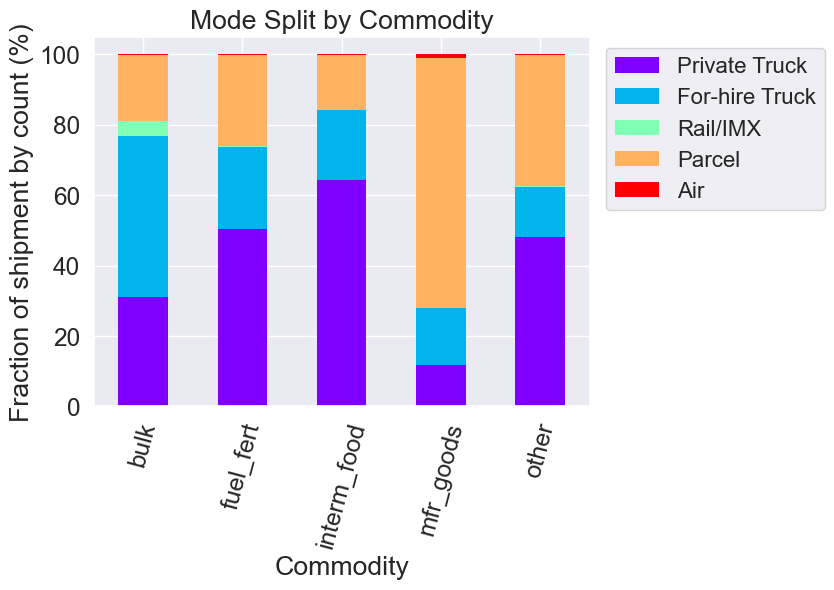

In [7]:
# count by commodity group (weighted)
count_by_commodity = pd.pivot_table(austin_mode_choide_df,
                                   index = 'commodity',
                                   columns = 'mode_agg5',
                                   values = 'WGT_FACTOR',
                                   aggfunc = 'sum')
count_by_commodity = calc_frac_table(count_by_commodity, 
                                     list_of_mode, mode_order)

count_by_commodity.plot.bar(stacked=True, colormap='rainbow', edgecolor='none')
plt.xlabel('Commodity')
plt.ylabel('Fraction of shipment by count (%)')
plt.xticks(rotation = 75)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize = 16)
plt.title('Mode Split by Commodity')
plt.savefig('plot/eda_weighted_count_by_commodity.jpg', dpi = 300,
           bbox_inches = 'tight')
plt.show()

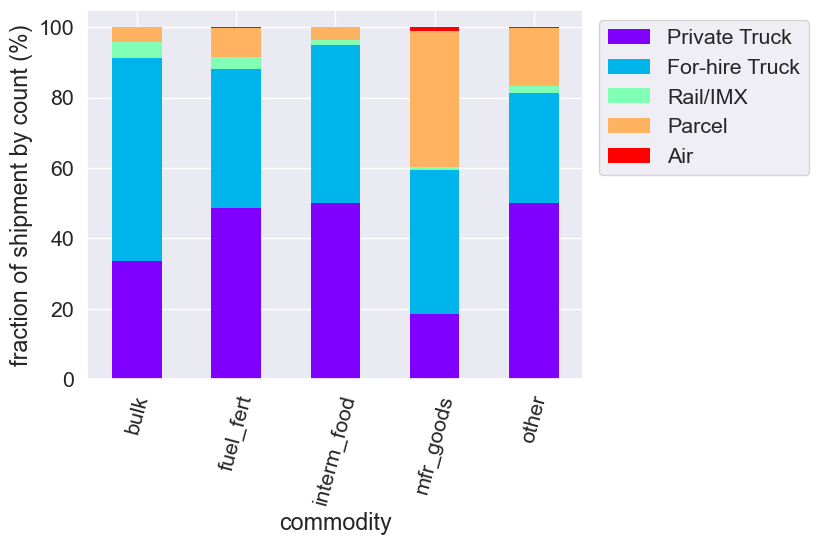

In [6]:
# count by commodity group (unweighted)
count_by_commodity = pd.pivot_table(austin_mode_choide_df,
                                   index = 'commodity',
                                   columns = 'mode_agg5',
                                   values = 'WGT_FACTOR',
                                   aggfunc = 'count')
count_by_commodity = calc_frac_table(count_by_commodity, 
                                     list_of_mode, mode_order)
count_by_commodity.plot.bar(stacked=True, colormap='rainbow', edgecolor='none')
plt.ylabel('fraction of shipment by count (%)')
plt.xticks(rotation = 75)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

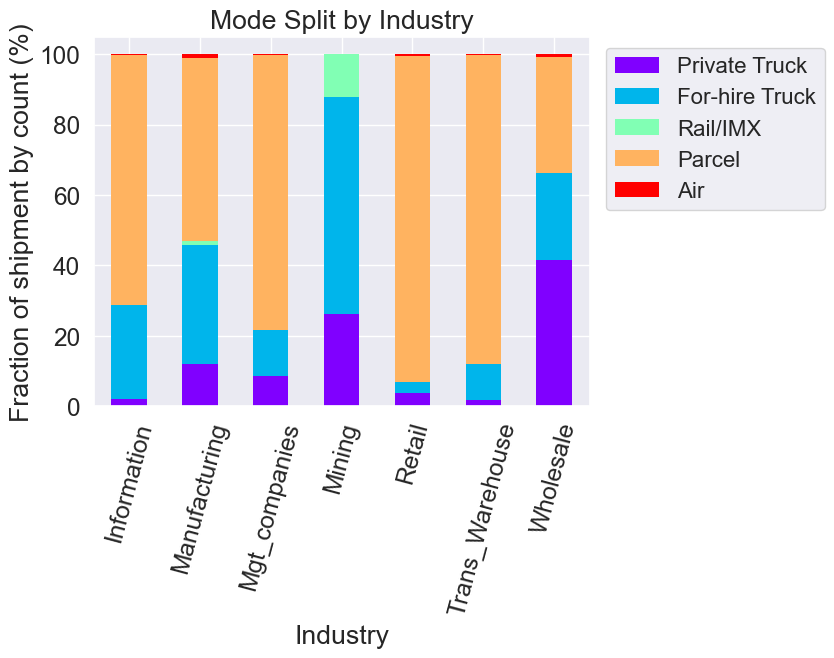

In [8]:
# count by industy (weighted)
count_by_industry = pd.pivot_table(austin_mode_choide_df,
                                   index = 'naics_name',
                                   columns = 'mode_agg5',
                                   values = 'WGT_FACTOR',
                                   aggfunc = 'sum')
# print(count_by_industry)
count_by_industry = calc_frac_table(count_by_industry, 
                                     list_of_mode, mode_order)

count_by_industry.plot.bar(stacked=True, colormap='rainbow', edgecolor='none')
plt.xlabel('Industry')
plt.ylabel('Fraction of shipment by count (%)')
plt.xticks(rotation = 75)
plt.title('Mode Split by Industry')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize = 16)
plt.savefig('plot/eda_weighted_count_by_industry.jpg', dpi = 300,
           bbox_inches = 'tight')
plt.show()

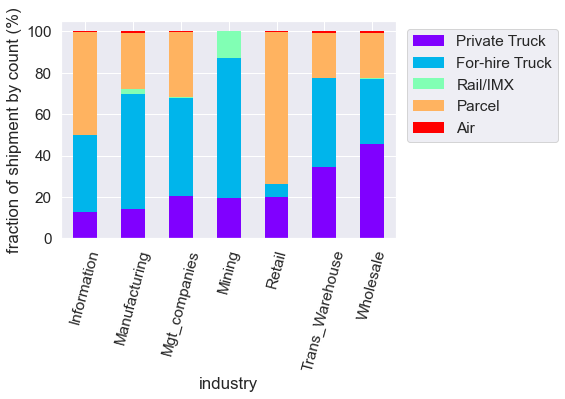

In [23]:
# count by commodity group (unweighted)
count_by_industry = pd.pivot_table(austin_mode_choide_df,
                                   index = 'naics_name',
                                   columns = 'mode_agg5',
                                   values = 'WGT_FACTOR',
                                   aggfunc = 'count')
count_by_industry = calc_frac_table(count_by_industry, 
                                     list_of_mode, mode_order)
count_by_industry.plot.bar(stacked=True, colormap='rainbow', edgecolor='none')
plt.xlabel('industry')
plt.ylabel('fraction of shipment by count (%)')
plt.xticks(rotation = 75)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

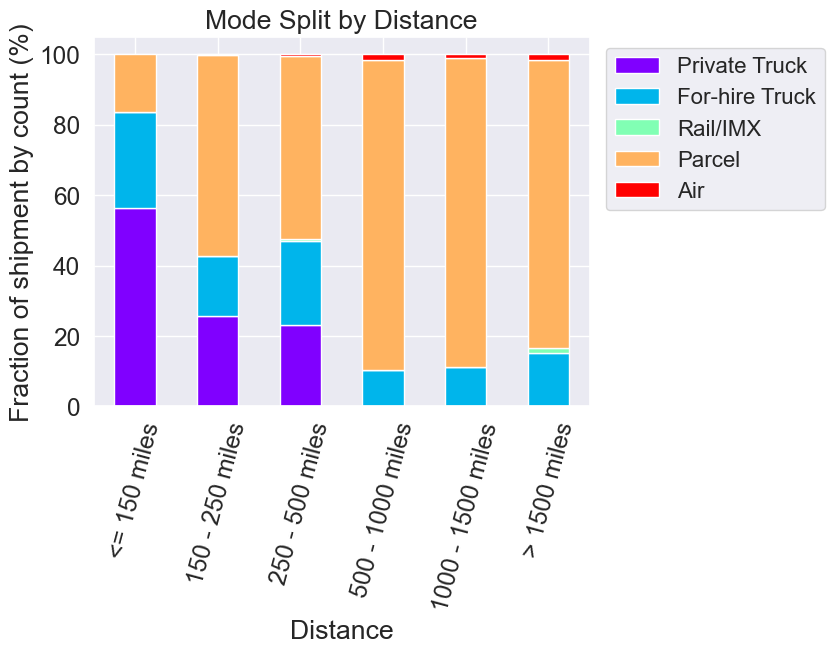

In [10]:
# count by distance bin (weighted)
count_by_distance = pd.pivot_table(austin_mode_choide_df,
                                   index = 'DIST_BIN',
                                   columns = 'mode_agg5',
                                   values = 'WGT_FACTOR',
                                   aggfunc = 'sum')
# print(count_by_industry)
count_by_distance = calc_frac_table(count_by_distance, 
                                     list_of_mode, mode_order)

# order distance bin
dist_bin_order = {'<= 150 miles': 1,
                  '150 - 250 miles': 2, 
                  '250 - 500 miles': 3,
                  '500 - 1000 miles': 4, 
                  '1000 - 1500 miles': 5, 
                  '> 1500 miles': 6}
count_by_distance = count_by_distance.reset_index()
count_by_distance.loc[:, 'order'] = \
count_by_distance.loc[:, 'DIST_BIN'].map(dist_bin_order)
count_by_distance = count_by_distance.sort_values(by = 'order')
count_by_distance = count_by_distance.drop(columns = ['order'])

count_by_distance.plot.bar(x = 'DIST_BIN',
                           stacked=True,  colormap='rainbow')
plt.xlabel('Distance')
plt.ylabel('Fraction of shipment by count (%)')
plt.xticks(rotation = 75)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize = 16)
plt.title('Mode Split by Distance')
plt.savefig('plot/eda_weighted_count_by_distance.jpg', dpi = 300,
           bbox_inches = 'tight')
plt.show()

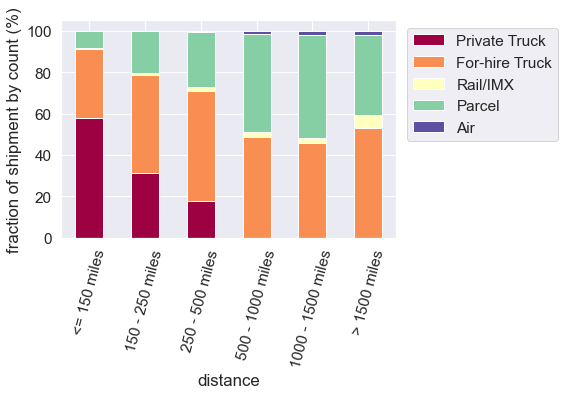

In [10]:
# count by distance bin (unweighted)
count_by_distance = pd.pivot_table(austin_mode_choide_df,
                                   index = 'DIST_BIN',
                                   columns = 'mode_agg5',
                                   values = 'WGT_FACTOR',
                                   aggfunc = 'count')
# print(count_by_industry)
count_by_distance = calc_frac_table(count_by_distance, 
                                     list_of_mode, mode_order)

# order distance bin
# dist_bin_order = {'<= 150 miles': 1,
#                   '150 - 250 miles': 2, 
#                   '250 - 500 miles': 3,
#                   '500 - 1000 miles': 4, 
#                   '1000 - 1500 miles': 5, 
#                   '> 1500 miles': 6}
count_by_distance = count_by_distance.reset_index()
count_by_distance.loc[:, 'order'] = \
count_by_distance.loc[:, 'DIST_BIN'].map(dist_bin_order)
count_by_distance = count_by_distance.sort_values(by = 'order')
count_by_distance = count_by_distance.drop(columns = ['order'])

count_by_distance.plot.bar(x = 'DIST_BIN',
                           stacked=True,  colormap='Spectral')
plt.xlabel('distance')
plt.ylabel('fraction of shipment by count (%)')
plt.xticks(rotation = 75)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

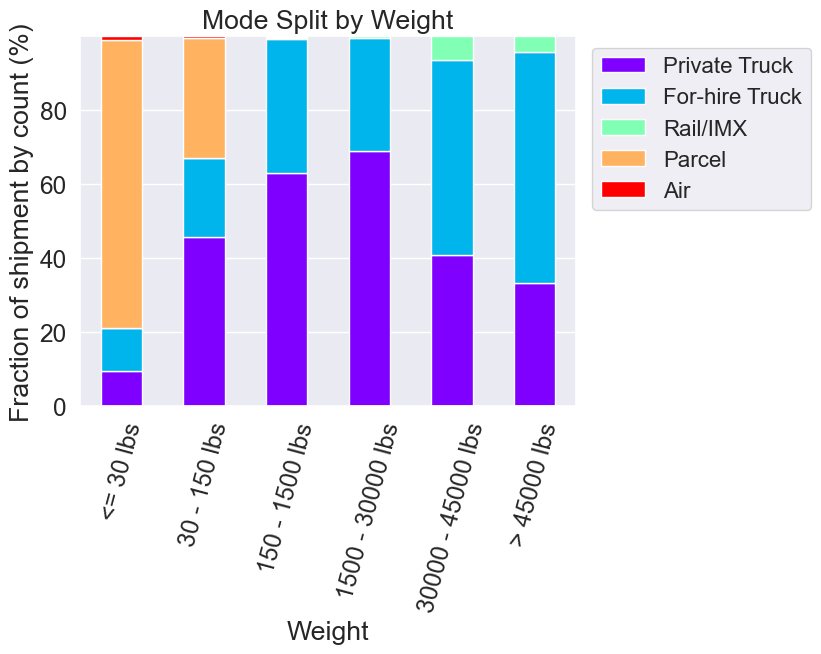

In [11]:
# count by weight bin (weighted)
count_by_weight = pd.pivot_table(austin_mode_choide_df,
                                   index = 'WGHT_BIN',
                                   columns = 'mode_agg5',
                                   values = 'WGT_FACTOR',
                                   aggfunc = 'sum')
# print(count_by_industry)
count_by_weight = calc_frac_table(count_by_weight, 
                                     list_of_mode, mode_order)

# order distance bin
wgt_bin_order = {'<= 30 lbs': 1,
                  '30 - 150 lbs': 2, 
                  '150 - 1500 lbs': 3,
                  '1500 - 30000 lbs': 4, 
                  '30000 - 45000 lbs': 5, 
                  '> 45000 lbs': 6}
count_by_weight = count_by_weight.reset_index()
count_by_weight.loc[:, 'order'] = \
count_by_weight.loc[:, 'WGHT_BIN'].map(wgt_bin_order)
count_by_weight = count_by_weight.sort_values(by = 'order')
count_by_weight = count_by_weight.drop(columns = ['order'])

count_by_weight.plot.bar(x = 'WGHT_BIN',
                           stacked=True,  colormap='rainbow')
plt.xlabel('Weight')
plt.ylabel('Fraction of shipment by count (%)')
plt.xticks(rotation = 75)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize = 16)
plt.title('Mode Split by Weight')
plt.savefig('plot/eda_weighted_count_by_weight.jpg', dpi = 300,
           bbox_inches = 'tight')
plt.show()

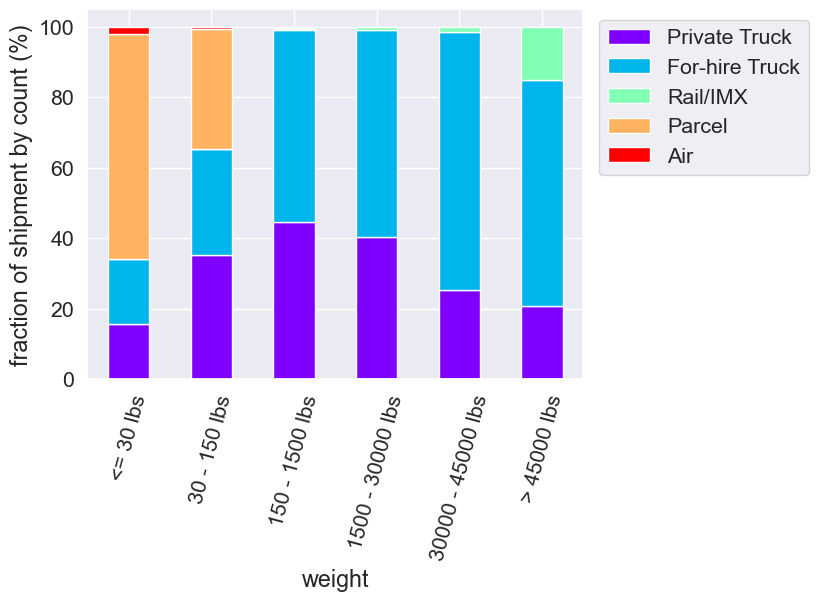

In [11]:
# count by weight bin (unweighted)
count_by_weight = pd.pivot_table(austin_mode_choide_df,
                                   index = 'WGHT_BIN',
                                   columns = 'mode_agg5',
                                   values = 'WGT_FACTOR',
                                   aggfunc = 'count')
# print(count_by_industry)
count_by_weight = calc_frac_table(count_by_weight, 
                                     list_of_mode, mode_order)

# order distance bin
# wgt_bin_order = {'<= 30 lbs': 1,
#                   '30 - 150 lbs': 2, 
#                   '150 - 1500 lbs': 3,
#                   '1500 - 30000 lbs': 4, 
#                   '30000 - 45000 lbs': 5, 
#                   '> 45000 lbs': 6}
count_by_weight = count_by_weight.reset_index()
count_by_weight.loc[:, 'order'] = \
count_by_weight.loc[:, 'WGHT_BIN'].map(wgt_bin_order)
count_by_weight = count_by_weight.sort_values(by = 'order')
count_by_weight = count_by_weight.drop(columns = ['order'])

count_by_weight.plot.bar(x = 'WGHT_BIN',
                           stacked=True,  colormap='rainbow')
plt.xlabel('weight')
plt.ylabel('fraction of shipment by count (%)')
plt.xticks(rotation = 75)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.savefig('plot/eda_weighted_count_by_commodity.jpg', dpi = 300)
plt.show()

In [19]:
austin_mode_choide_df.VAL_DEN_BIN.unique()

array(['> 30 $/lb', '<= 1 $/lb', '1 - 5 $/lbs', '10 - 30 $/lb',
       '5 - 10 $/lb'], dtype=object)

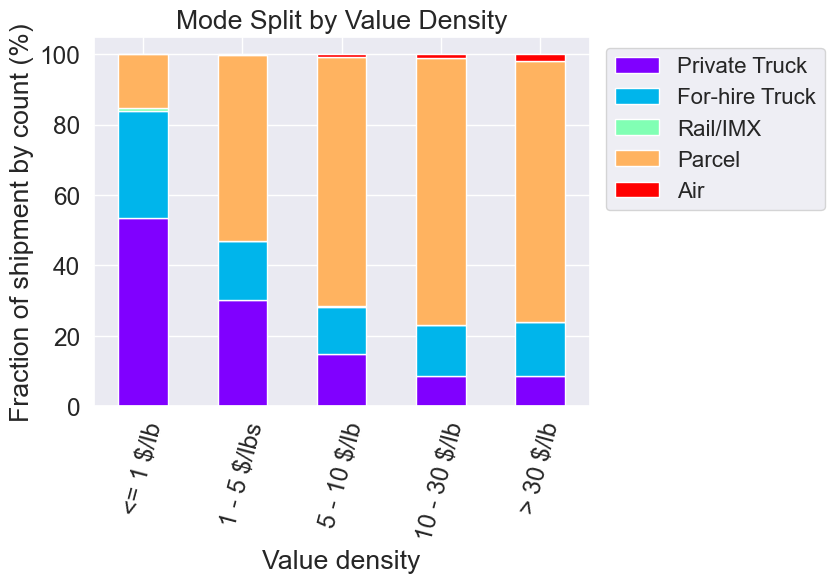

In [12]:
# count by value density (weighted)
count_by_value_den = pd.pivot_table(austin_mode_choide_df,
                                   index = 'VAL_DEN_BIN',
                                   columns = 'mode_agg5',
                                   values = 'WGT_FACTOR',
                                   aggfunc = 'sum')
# print(count_by_industry)
count_by_value_den = calc_frac_table(count_by_value_den, 
                                     list_of_mode, mode_order)

# order distance bin
vd_bin_order = {'<= 1 $/lb': 1,
                  '1 - 5 $/lbs': 2, 
                  '5 - 10 $/lb': 3,
                  '10 - 30 $/lb': 4, 
                  '> 30 $/lb': 5}
count_by_value_den = count_by_value_den.reset_index()
count_by_value_den.loc[:, 'order'] = \
count_by_value_den.loc[:, 'VAL_DEN_BIN'].map(vd_bin_order)
count_by_value_den = count_by_value_den.sort_values(by = 'order')
count_by_value_den = count_by_value_den.drop(columns = ['order'])

count_by_value_den.plot.bar(x = 'VAL_DEN_BIN',
                           stacked=True,  colormap='rainbow')
plt.xlabel('Value density')
plt.ylabel('Fraction of shipment by count (%)')
plt.xticks(rotation = 75)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize = 16)
plt.title('Mode Split by Value Density')
plt.savefig('plot/eda_weighted_count_by_value_density.jpg', dpi = 300,
           bbox_inches = 'tight')
plt.show()

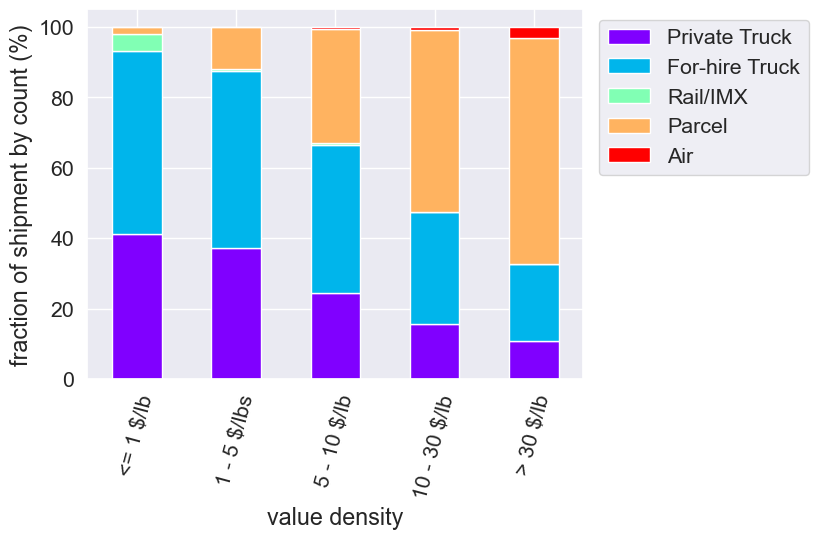

In [13]:
# count by value density (unweighted)
count_by_value_den = pd.pivot_table(austin_mode_choide_df,
                                   index = 'VAL_DEN_BIN',
                                   columns = 'mode_agg5',
                                   values = 'WGT_FACTOR',
                                   aggfunc = 'count')
# print(count_by_industry)
count_by_value_den = calc_frac_table(count_by_value_den, 
                                     list_of_mode, mode_order)

# order distance bin
# vd_bin_order = {'<= 1 $/lb': 1,
#                   '1 - 5 $/lbs': 2, 
#                   '5 - 10 $/lb': 3,
#                   '10 - 30 $/lb': 4, 
#                   '> 30 $/lb': 5}
count_by_value_den = count_by_value_den.reset_index()
count_by_value_den.loc[:, 'order'] = \
count_by_value_den.loc[:, 'VAL_DEN_BIN'].map(vd_bin_order)
count_by_value_den = count_by_value_den.sort_values(by = 'order')
count_by_value_den = count_by_value_den.drop(columns = ['order'])

count_by_value_den.plot.bar(x = 'VAL_DEN_BIN',
                           stacked=True,  colormap='rainbow')
plt.xlabel('value density')
plt.ylabel('fraction of shipment by count (%)')
plt.xticks(rotation = 75)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

In [11]:
austin_mode_choide_df.TIME_BIN.unique()

array(['16 - 24 hrs', '> 72 hrs', '24 - 72 hrs', '<= 8 hrs', '8 - 16 hrs'],
      dtype=object)

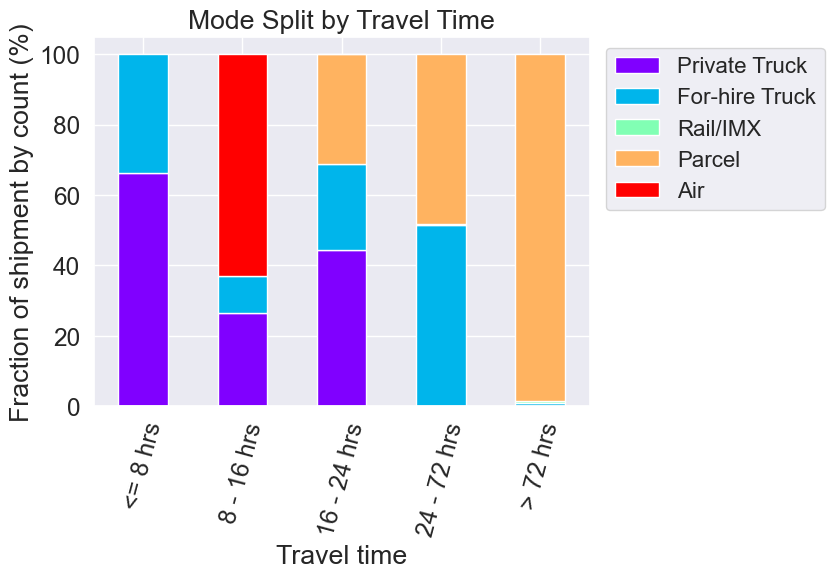

In [13]:
# count by travel time (weighted)
count_by_time = pd.pivot_table(austin_mode_choide_df,
                                   index = 'TIME_BIN',
                                   columns = 'mode_agg5',
                                   values = 'WGT_FACTOR',
                                   aggfunc = 'sum')
# print(count_by_industry)
count_by_time = calc_frac_table(count_by_time, 
                                     list_of_mode, mode_order)

# order distance bin
time_bin_order = {'<= 8 hrs': 1,
                  '8 - 16 hrs': 2, 
                  '16 - 24 hrs': 3,
                  '24 - 72 hrs': 4, 
                 '> 72 hrs': 5}
count_by_time = count_by_time.reset_index()
count_by_time.loc[:, 'order'] = \
count_by_time.loc[:, 'TIME_BIN'].map(time_bin_order)
count_by_time = count_by_time.sort_values(by = 'order')
count_by_time = count_by_time.drop(columns = ['order'])

count_by_time.plot.bar(x = 'TIME_BIN',
                           stacked=True,  colormap='rainbow')
plt.xlabel('Travel time')
plt.ylabel('Fraction of shipment by count (%)')
plt.xticks(rotation = 75)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize = 16)
plt.title('Mode Split by Travel Time')
plt.savefig('plot/eda_weighted_count_by_travel_time.jpg', dpi = 300,
           bbox_inches = 'tight')
plt.show()

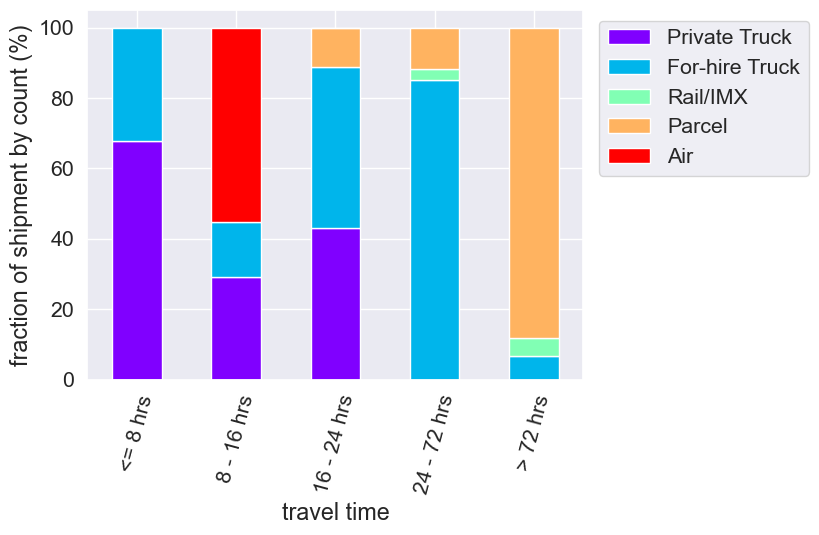

In [15]:
# count by travel time (unweighted)
count_by_time = pd.pivot_table(austin_mode_choide_df,
                                   index = 'TIME_BIN',
                                   columns = 'mode_agg5',
                                   values = 'WGT_FACTOR',
                                   aggfunc = 'count')
# print(count_by_industry)
count_by_time = calc_frac_table(count_by_time, 
                                     list_of_mode, mode_order)

# order distance bin
# time_bin_order = {'<= 8 hrs': 1,
#                   '8 - 16 hrs': 2, 
#                   '16 - 24 hrs': 3,
#                   '24 - 48 hrs': 4, 
#                   '48 - 72 hrs': 5,
#                  '> 72 hrs': 6}
count_by_time = count_by_time.reset_index()
count_by_time.loc[:, 'order'] = \
count_by_time.loc[:, 'TIME_BIN'].map(time_bin_order)
count_by_time = count_by_time.sort_values(by = 'order')
count_by_time = count_by_time.drop(columns = ['order'])

count_by_time.plot.bar(x = 'TIME_BIN',
                           stacked=True,  colormap='rainbow')
plt.xlabel('travel time')
plt.ylabel('fraction of shipment by count (%)')
plt.xticks(rotation = 75)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

In [13]:
austin_mode_choide_df.COST_BIN.unique()

array(['$50 - $150', '$150 - $500', '<= $20', '$500 - $1000', '$20 - $50',
       '> $1000'], dtype=object)

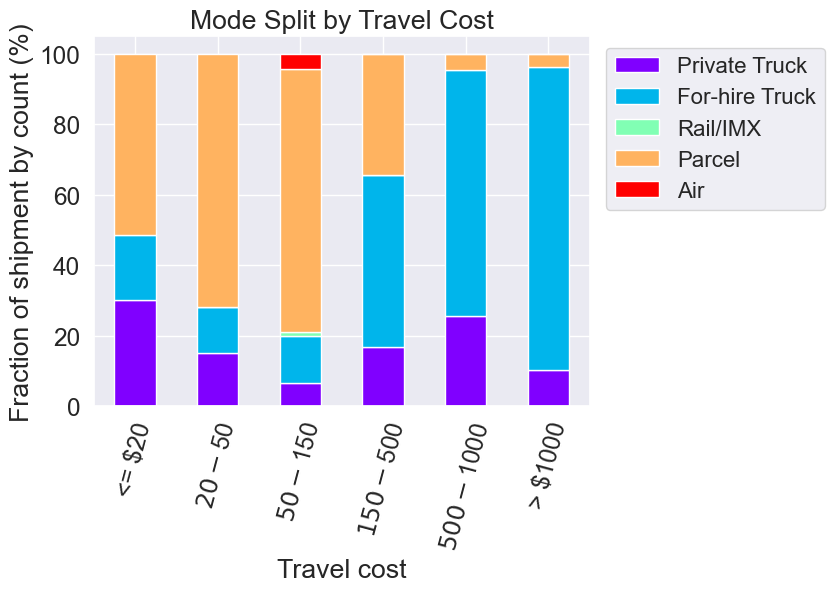

In [14]:
# count by travel cost (weighted)
count_by_cost = pd.pivot_table(austin_mode_choide_df,
                                   index = 'COST_BIN',
                                   columns = 'mode_agg5',
                                   values = 'WGT_FACTOR',
                                   aggfunc = 'sum')
# print(count_by_industry)
count_by_cost = calc_frac_table(count_by_cost, 
                                     list_of_mode, mode_order)

# order distance bin
cost_bin_order = {'<= $20': 1,
                  '$20 - $50': 2, 
                  '$50 - $150': 3,
                  '$150 - $500': 4, 
                  '$500 - $1000': 5,
                  '> $1000': 6}
count_by_cost = count_by_cost.reset_index()
count_by_cost.loc[:, 'order'] = \
count_by_cost.loc[:, 'COST_BIN'].map(cost_bin_order)
count_by_cost = count_by_cost.sort_values(by = 'order')
count_by_cost = count_by_cost.drop(columns = ['order'])

count_by_cost.plot.bar(x = 'COST_BIN',
                           stacked=True,  colormap='rainbow')
plt.xlabel('Travel cost')
plt.ylabel('Fraction of shipment by count (%)')
plt.xticks(rotation = 75)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize = 16)
plt.title('Mode Split by Travel Cost')
plt.savefig('plot/eda_weighted_count_by_cost.jpg', dpi = 300,
           bbox_inches = 'tight')
plt.show()

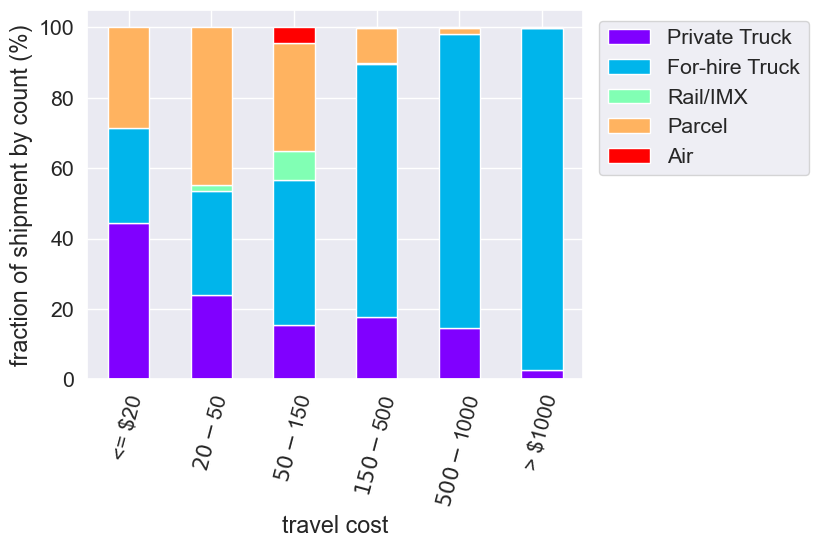

In [17]:
# count by travel cost (unweighted)
count_by_cost = pd.pivot_table(austin_mode_choide_df,
                                   index = 'COST_BIN',
                                   columns = 'mode_agg5',
                                   values = 'WGT_FACTOR',
                                   aggfunc = 'count')
# print(count_by_industry)
count_by_cost = calc_frac_table(count_by_cost, 
                                     list_of_mode, mode_order)

# order distance bin
# cost_bin_order = {'<= $5': 1,
#                   '$5 - $10': 2, 
#                   '$10 - $20': 3,
#                   '$20 - $50': 4, 
#                   '$50 - $150': 5,
#                   '> $150': 6}
count_by_cost = count_by_cost.reset_index()
count_by_cost.loc[:, 'order'] = \
count_by_cost.loc[:, 'COST_BIN'].map(cost_bin_order)
count_by_cost = count_by_cost.sort_values(by = 'order')
count_by_cost = count_by_cost.drop(columns = ['order'])

count_by_cost.plot.bar(x = 'COST_BIN',
                           stacked=True,  colormap='rainbow')
plt.xlabel('travel cost')
plt.ylabel('fraction of shipment by count (%)')
plt.xticks(rotation = 75)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

In [34]:
austin_mode_choide_df.ship_cost.quantile(0.95)

1816.3056239999999